# <p style="font-family: Fantasy, fantasy; line-height: 3.3; font-size: 40px; letter-spacing: 5px; text-align: center; color: #4d4dff">Detecting FRAUD transactions of ETHEREUM</p>
![](https://miro.medium.com/max/1000/1*Jg_EBfBl8yOa6r1i9pCMEw.png)

In [1]:
# running k(k=10)-fold coss-validation on dataset2. Running 10 iterations
# storing max and min precision value of each iteration and showing 
# max, min, variance and average precision

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Libraries</p>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix
import pickle
from sklearn.neighbors import KNeighborsClassifier

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data Reading</p>

In [48]:
#df = pd.read_csv('../input/ethereum-frauddetection-dataset/transaction_dataset.csv', index_col=0)
df = pd.read_csv('/kaggle/input/newDataset/eth_illicit_features 2.csv', index_col=0)
print(df.shape)
df.head()

(12146, 33)


,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,1,0.0,2387389.0,5.807655e+04,89.0,1.501076e+09,7.148260e+07,46,66,21,...,0.291940,10,60,0.313433,0.750000,0.238636,0.969121,0.888782,1.891304,147.701484
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.0,0.0,0.000000e+00,3021091.0,1.502802e+09,7.529115e+08,35,0,2,...,0.013541,2,1,2.000000,0.000000,0.666667,0.000000,0.238480,0.057143,0.005000
0x00e01a648ff41346cdeb873182383333d2184dd1,1,37.0,25112882.0,1.710279e+06,0.0,1.500397e+09,6.820612e+07,299,15,22,...,0.266494,14,16,1.375000,0.394737,0.578947,0.465450,0.614205,0.123746,52.129575
0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,0.0,642460.0,1.576106e+04,0.0,1.500037e+09,1.352571e+07,36,109,111,...,0.007419,36,67,1.009091,0.493213,0.502262,0.957906,0.794121,6.111111,233.689231
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.0,0.0,0.000000e+00,3894.0,1.500402e+09,3.751409e+08,82,1,4,...,0.002199,3,3,2.000000,0.166667,0.666667,0.000000,0.406556,0.060976,0.757788


In [49]:
df.describe()

,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
count,12146.000000,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,12146.000000,12146.000000,12146.000000,...,1.214600e+04,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,1.214600e+04,1.214600e+04,12146.000000,1.214600e+04
mean,0.424008,2.649065e+04,4.270947e+07,3.648564e+06,2.499426e+05,1.162226e+09,1.601823e+08,191.749630,517.366787,678.387617,...,-1.367650e+02,85.492343,209.392393,581.427949,0.458685,0.452111,4.341055e-01,4.104000e-01,64.605495,6.970988e+02
std,0.494212,7.167752e+05,2.510061e+08,4.121296e+07,3.403948e+06,7.159138e+08,2.329373e+08,299.970482,1875.017481,2253.808922,...,6.582241e+04,172.709068,974.655740,2206.404201,0.332333,0.317690,3.745526e-01,3.009740e-01,543.602564,2.432648e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,...,-5.348493e+06,1.000000,1.000000,0.000000,0.000000,0.000000,-6.735319e-17,-9.316840e-17,0.001145,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.794640e+06,8.564709e+04,9.000000,1.000000,3.000000,...,-3.532467e-01,3.000000,2.000000,0.230311,0.142857,0.186526,0.000000e+00,9.707937e-02,0.277778,8.364961e-02
50%,0.000000,0.000000e+00,2.042395e+05,1.490919e+04,4.800000e+01,1.578994e+09,4.776982e+07,68.000000,6.000000,11.000000,...,1.563244e-03,15.000000,5.000000,0.620312,0.454545,0.375000,4.940496e-01,4.459279e-01,1.080336,9.335405e-01
75%,1.000000,8.000000e+01,1.845179e+06,1.391289e+05,7.147500e+02,1.640623e+09,2.192212e+08,251.000000,70.000000,55.000000,...,4.064367e-02,85.000000,24.000000,2.741071,0.773654,0.714286,8.008659e-01,6.347963e-01,4.000000,6.826739e+00
max,1.000000,6.198813e+07,1.658260e+09,8.291299e+08,1.508562e+08,1.658260e+09,8.309932e+08,2293.000000,10000.000000,10000.000000,...,1.847901e+06,1912.000000,10000.000000,10000.000000,0.999900,0.999900,9.998963e-01,9.998940e-01,10000.000000,2.038484e+06


In [50]:
df.var()

flag                       2.442453e-01
minTimeBetweenSentTnx      5.137667e+11
maxTimeBetweenSentTnx      6.300406e+16
avgTimeBetweenSentTnx      1.698508e+15
minTimeBetweenRecTnx       1.158686e+13
maxTimeBetweenRecTnx       5.125326e+17
avgTimeBetweenRecTnx       5.425980e+16
lifetime                   8.998229e+04
sentTransactions           3.515691e+06
receivedTransactions       5.079655e+06
createdContracts           1.114207e+04
numUniqSentAddress         3.881016e+05
numUniqRecAddress          1.265501e+06
minValSent                 6.139942e+04
maxValSent                 3.659123e+07
avgValSent                 8.773704e+04
minValReceived             2.448074e+05
maxValReceived             6.729808e+07
avgValReceived             7.119741e+06
totalTransactions          8.617149e+06
totalEtherSent             8.585796e+09
totalEtherReceived         3.390950e+09
totalEtherSentContracts    1.254558e-01
totalEtherBalance          4.332590e+09
activityDays               2.982842e+04


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12146 entries, 0xd0cc2b24980cbcca47ef755da88b220a82291407 to 0x53d5d85e9a67fc0178a5216fdedde4050a82693e
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flag                     12146 non-null  int64  
 1   minTimeBetweenSentTnx    12146 non-null  float64
 2   maxTimeBetweenSentTnx    12146 non-null  float64
 3   avgTimeBetweenSentTnx    12146 non-null  float64
 4   minTimeBetweenRecTnx     12146 non-null  float64
 5   maxTimeBetweenRecTnx     12146 non-null  float64
 6   avgTimeBetweenRecTnx     12146 non-null  float64
 7   lifetime                 12146 non-null  int64  
 8   sentTransactions         12146 non-null  int64  
 9   receivedTransactions     12146 non-null  int64  
 10  createdContracts         12146 non-null  int64  
 11  numUniqSentAddress       12146 non-null  int64  
 12  numUniqRecAddress        12146 non-null  int64  
 13  min

In [52]:
# Ommit first two columns (Index, Adress)
#df = df.iloc[:,2:]

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data information & exploration</p>

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12146 entries, 0xd0cc2b24980cbcca47ef755da88b220a82291407 to 0x53d5d85e9a67fc0178a5216fdedde4050a82693e
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flag                     12146 non-null  int64  
 1   minTimeBetweenSentTnx    12146 non-null  float64
 2   maxTimeBetweenSentTnx    12146 non-null  float64
 3   avgTimeBetweenSentTnx    12146 non-null  float64
 4   minTimeBetweenRecTnx     12146 non-null  float64
 5   maxTimeBetweenRecTnx     12146 non-null  float64
 6   avgTimeBetweenRecTnx     12146 non-null  float64
 7   lifetime                 12146 non-null  int64  
 8   sentTransactions         12146 non-null  int64  
 9   receivedTransactions     12146 non-null  int64  
 10  createdContracts         12146 non-null  int64  
 11  numUniqSentAddress       12146 non-null  int64  
 12  numUniqRecAddress        12146 non-null  int64  
 13  min

In [54]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

""
address
0xd0cc2b24980cbcca47ef755da88b220a82291407
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1
0x00e01a648ff41346cdeb873182383333d2184dd1
0x858457daa7e087ad74cdeeceab8419079bc2ca03
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d
...
0x38e404b6ca4549988ced1d065330f1f722787924
0x8f40dac94ac52f90218d9aa5e605fe39dabe3979
0xb92027b6adee9f63290a5a1bd9d15d6a163f4012


In [55]:
# Inspect categoricals
for i in df[categories].columns:
    print(f'The categorical column --{i}-- has --{len(df[i].value_counts())}-- unique values')

In [56]:
# Inspect numericals
numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()

,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
count,12146.000000,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,12146.000000,12146.000000,12146.000000,...,1.214600e+04,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,1.214600e+04,1.214600e+04,12146.000000,1.214600e+04
mean,0.424008,2.649065e+04,4.270947e+07,3.648564e+06,2.499426e+05,1.162226e+09,1.601823e+08,191.749630,517.366787,678.387617,...,-1.367650e+02,85.492343,209.392393,581.427949,0.458685,0.452111,4.341055e-01,4.104000e-01,64.605495,6.970988e+02
std,0.494212,7.167752e+05,2.510061e+08,4.121296e+07,3.403948e+06,7.159138e+08,2.329373e+08,299.970482,1875.017481,2253.808922,...,6.582241e+04,172.709068,974.655740,2206.404201,0.332333,0.317690,3.745526e-01,3.009740e-01,543.602564,2.432648e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,...,-5.348493e+06,1.000000,1.000000,0.000000,0.000000,0.000000,-6.735319e-17,-9.316840e-17,0.001145,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.794640e+06,8.564709e+04,9.000000,1.000000,3.000000,...,-3.532467e-01,3.000000,2.000000,0.230311,0.142857,0.186526,0.000000e+00,9.707937e-02,0.277778,8.364961e-02
50%,0.000000,0.000000e+00,2.042395e+05,1.490919e+04,4.800000e+01,1.578994e+09,4.776982e+07,68.000000,6.000000,11.000000,...,1.563244e-03,15.000000,5.000000,0.620312,0.454545,0.375000,4.940496e-01,4.459279e-01,1.080336,9.335405e-01
75%,1.000000,8.000000e+01,1.845179e+06,1.391289e+05,7.147500e+02,1.640623e+09,2.192212e+08,251.000000,70.000000,55.000000,...,4.064367e-02,85.000000,24.000000,2.741071,0.773654,0.714286,8.008659e-01,6.347963e-01,4.000000,6.826739e+00
max,1.000000,6.198813e+07,1.658260e+09,8.291299e+08,1.508562e+08,1.658260e+09,8.309932e+08,2293.000000,10000.000000,10000.000000,...,1.847901e+06,1912.000000,10000.000000,10000.000000,0.999900,0.999900,9.998963e-01,9.998940e-01,10000.000000,2.038484e+06


In [57]:
# Inspect features variance
df[numericals].var()

flag                       2.442453e-01
minTimeBetweenSentTnx      5.137667e+11
maxTimeBetweenSentTnx      6.300406e+16
avgTimeBetweenSentTnx      1.698508e+15
minTimeBetweenRecTnx       1.158686e+13
maxTimeBetweenRecTnx       5.125326e+17
avgTimeBetweenRecTnx       5.425980e+16
lifetime                   8.998229e+04
sentTransactions           3.515691e+06
receivedTransactions       5.079655e+06
createdContracts           1.114207e+04
numUniqSentAddress         3.881016e+05
numUniqRecAddress          1.265501e+06
minValSent                 6.139942e+04
maxValSent                 3.659123e+07
avgValSent                 8.773704e+04
minValReceived             2.448074e+05
maxValReceived             6.729808e+07
avgValReceived             7.119741e+06
totalTransactions          8.617149e+06
totalEtherSent             8.585796e+09
totalEtherReceived         3.390950e+09
totalEtherSentContracts    1.254558e-01
totalEtherBalance          4.332590e+09
activityDays               2.982842e+04


0    6996
1    5150
Name: flag, dtype: int64


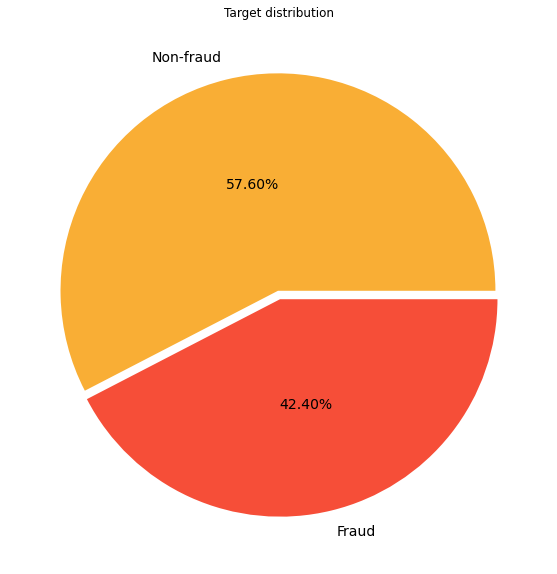

In [58]:
# Inspect target distribution
print(df['flag'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['flag'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

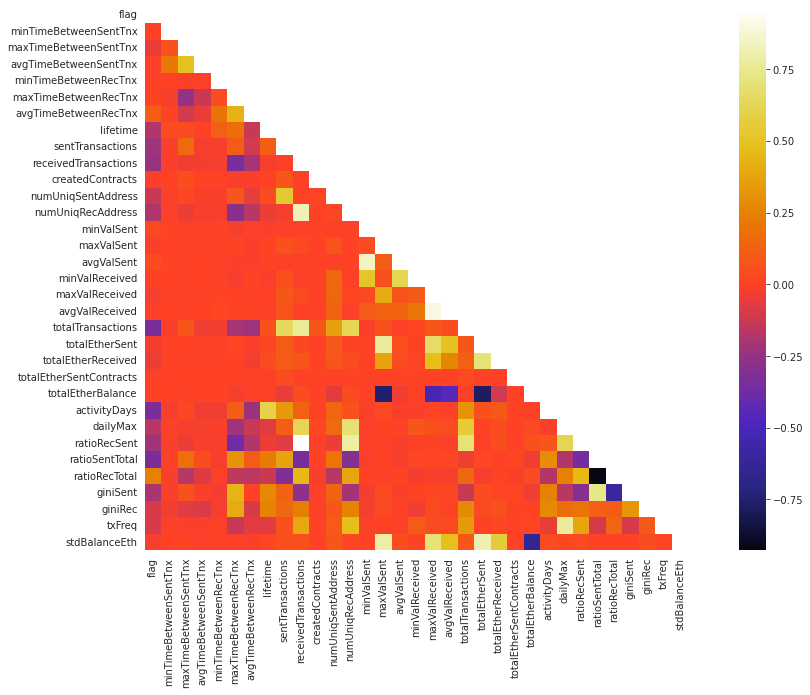

In [59]:
# Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data cleaning</p>

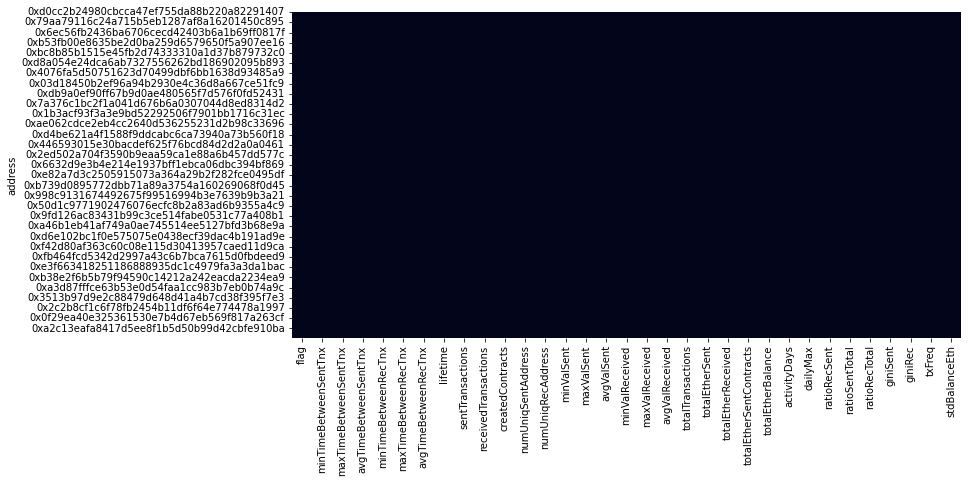

In [60]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [61]:
# Drop the two categorical features
df.drop(df[categories], axis=1, inplace=True)

In [62]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

(12146, 33)


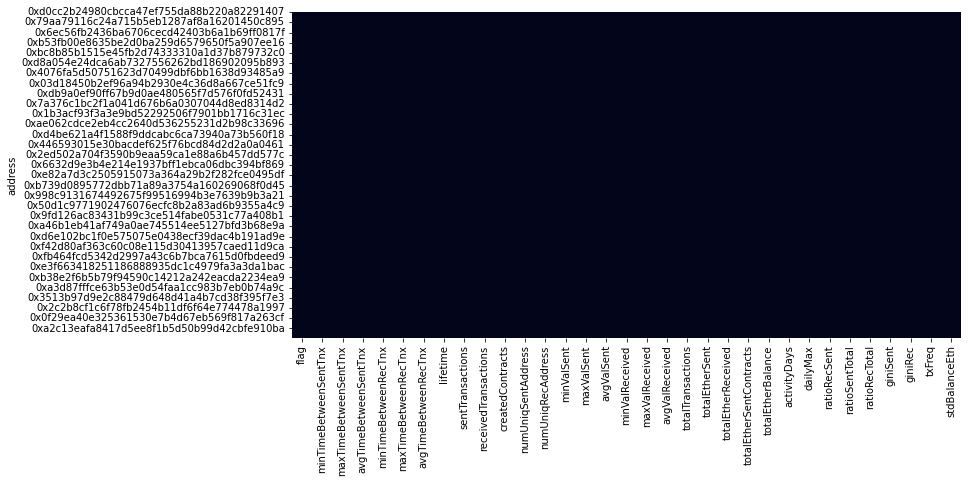

In [63]:
# Visualize missings pattern of the dataframe
print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Investigating the variance of the features, it was observed that there are some features with a variance = 0

In [64]:
# Filtering the features with 0 variance
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

Series([], dtype: float64)


flag                       2.442453e-01
minTimeBetweenSentTnx      5.137667e+11
maxTimeBetweenSentTnx      6.300406e+16
avgTimeBetweenSentTnx      1.698508e+15
minTimeBetweenRecTnx       1.158686e+13
maxTimeBetweenRecTnx       5.125326e+17
avgTimeBetweenRecTnx       5.425980e+16
lifetime                   8.998229e+04
sentTransactions           3.515691e+06
receivedTransactions       5.079655e+06
createdContracts           1.114207e+04
numUniqSentAddress         3.881016e+05
numUniqRecAddress          1.265501e+06
minValSent                 6.139942e+04
maxValSent                 3.659123e+07
avgValSent                 8.773704e+04
minValReceived             2.448074e+05
maxValReceived             6.729808e+07
avgValReceived             7.119741e+06
totalTransactions          8.617149e+06
totalEtherSent             8.585796e+09
totalEtherReceived         3.390950e+09
totalEtherSentContracts    1.254558e-01
totalEtherBalance          4.332590e+09
activityDay

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12146 entries, 0xd0cc2b24980cbcca47ef755da88b220a82291407 to 0x53d5d85e9a67fc0178a5216fdedde4050a82693e
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flag                     12146 non-null  int64  
 1   minTimeBetweenSentTnx    12146 non-null  float64
 2   maxTimeBetweenSentTnx    12146 non-null  float64
 3   avgTimeBetweenSentTnx    12146 non-null  float64
 4   minTimeBetweenRecTnx     12146 non-null  float64
 5   maxTimeBetweenRecTnx     12146 non-null  float64
 6   avgTimeBetweenRecTnx     12146 non-null  float64
 7   lifetime                 12146 non-null  int64  
 8   sentTransactions         12146 non-null  int64  
 9   receivedTransactions     12146 non-null  int64  
 10  createdContracts         12146 non-null  int64  
 11  numUniqSentAddress       12146 non-null  int64  
 12  numUniqRecAddress        12146 non-null  int64  
 13  min

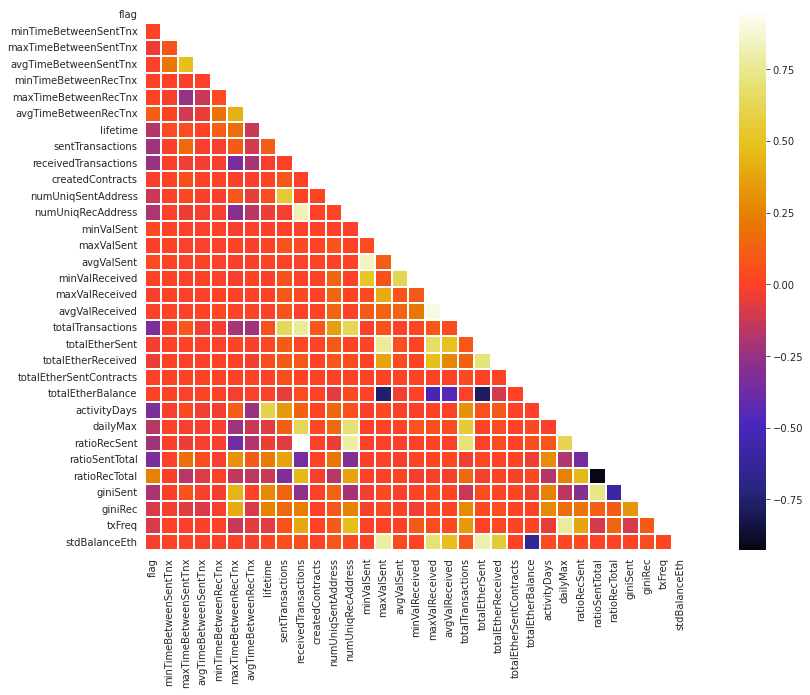

In [66]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [67]:
df.columns

Index(['flag', 'minTimeBetweenSentTnx', 'maxTimeBetweenSentTnx',
       'avgTimeBetweenSentTnx', 'minTimeBetweenRecTnx', 'maxTimeBetweenRecTnx',
       'avgTimeBetweenRecTnx', 'lifetime', 'sentTransactions',
       'receivedTransactions', 'createdContracts', 'numUniqSentAddress',
       'numUniqRecAddress', 'minValSent', 'maxValSent', 'avgValSent',
       'minValReceived', 'maxValReceived', 'avgValReceived',
       'totalTransactions', 'totalEtherSent', 'totalEtherReceived',
       'totalEtherSentContracts', 'totalEtherBalance', 'activityDays',
       'dailyMax', 'ratioRecSent', 'ratioSentTotal', 'ratioRecTotal',
       'giniSent', 'giniRec', 'txFreq', 'stdBalanceEth'],
      dtype='object')

In [68]:
col_list = list(df.columns)
col_list

['flag',
 'minTimeBetweenSentTnx',
 'maxTimeBetweenSentTnx',
 'avgTimeBetweenSentTnx',
 'minTimeBetweenRecTnx',
 'maxTimeBetweenRecTnx',
 'avgTimeBetweenRecTnx',
 'lifetime',
 'sentTransactions',
 'receivedTransactions',
 'createdContracts',
 'numUniqSentAddress',
 'numUniqRecAddress',
 'minValSent',
 'maxValSent',
 'avgValSent',
 'minValReceived',
 'maxValReceived',
 'avgValReceived',
 'totalTransactions',
 'totalEtherSent',
 'totalEtherReceived',
 'totalEtherSentContracts',
 'totalEtherBalance',
 'activityDays',
 'dailyMax',
 'ratioRecSent',
 'ratioSentTotal',
 'ratioRecTotal',
 'giniSent',
 'giniRec',
 'txFreq',
 'stdBalanceEth']

Drop one of those highly correlated features
    

In [69]:
drop = ['totalEtherSentContracts', 'maxValSent', 'avgValReceived',
        'avgValReceived', 'maxValReceived', 'minValReceived', 'numUniqRecAddress', 'maxValSent', 'avgValSent',
        'minValSent', 'maxValSent', 'totalTransactions', 'avgValSent', 'numUniqSentAddress',
        'numUniqRecAddress', 'totalEtherReceived', 'minValReceived', 'minValSent', 'numUniqRecAddress']
# df.drop(drop, axis=1, inplace=True)

In [70]:
new_col_list = list(set(col_list).difference(set(drop)))
df = df[new_col_list]
df

,giniSent,createdContracts,stdBalanceEth,dailyMax,activityDays,ratioRecTotal,sentTransactions,totalEtherBalance,lifetime,receivedTransactions,...,minTimeBetweenSentTnx,txFreq,maxTimeBetweenRecTnx,totalEtherSent,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,ratioSentTotal,minTimeBetweenRecTnx,flag,giniRec
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,0.969121,0,147.701484,60,10,0.238636,66,0.291940,46,21,...,0.0,1.891304,1.501076e+09,366.921190,2387389.0,5.807655e+04,0.750000,89.0,1,0.888782
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,0.000000,0,0.005000,1,2,0.666667,0,0.013541,35,2,...,0.0,0.057143,1.502802e+09,0.000000,0.0,0.000000e+00,0.000000,3021091.0,1,0.238480
0x00e01a648ff41346cdeb873182383333d2184dd1,0.465450,0,52.129575,16,14,0.578947,15,0.266494,299,22,...,37.0,0.123746,1.500397e+09,199.950000,25112882.0,1.710279e+06,0.394737,0.0,1,0.614205
0x858457daa7e087ad74cdeeceab8419079bc2ca03,0.957906,0,233.689231,67,36,0.502262,109,0.007419,36,111,...,0.0,6.111111,1.500037e+09,1630.570000,642460.0,1.576106e+04,0.493213,0.0,1,0.794121
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,0.000000,0,0.757788,3,3,0.666667,1,0.002199,82,4,...,0.0,0.060976,1.500402e+09,1.900000,0.0,0.000000e+00,0.166667,3894.0,1,0.406556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x38e404b6ca4549988ced1d065330f1f722787924,0.643490,0,0.236468,4,24,0.464286,14,0.009248,25,13,...,3.0,1.080000,1.656129e+09,3.094515,15139.0,1.186571e+03,0.500000,698.0,0,0.615051
0x8f40dac94ac52f90218d9aa5e605fe39dabe3979,0.856372,0,0.617016,3,136,0.142857,119,-1.600064,149,20,...,0.0,0.932886,1.648939e+09,16.220988,411419.0,2.206761e+04,0.850000,0.0,0,0.289923
0xb92027b6adee9f63290a5a1bd9d15d6a163f4012,0.000000,1,0.000000,296,41,0.996226,0,0.000000,48,528,...,0.0,11.020833,4.086570e+05,0.000000,0.0,0.000000e+00,0.000000,0.0,0,0.000000


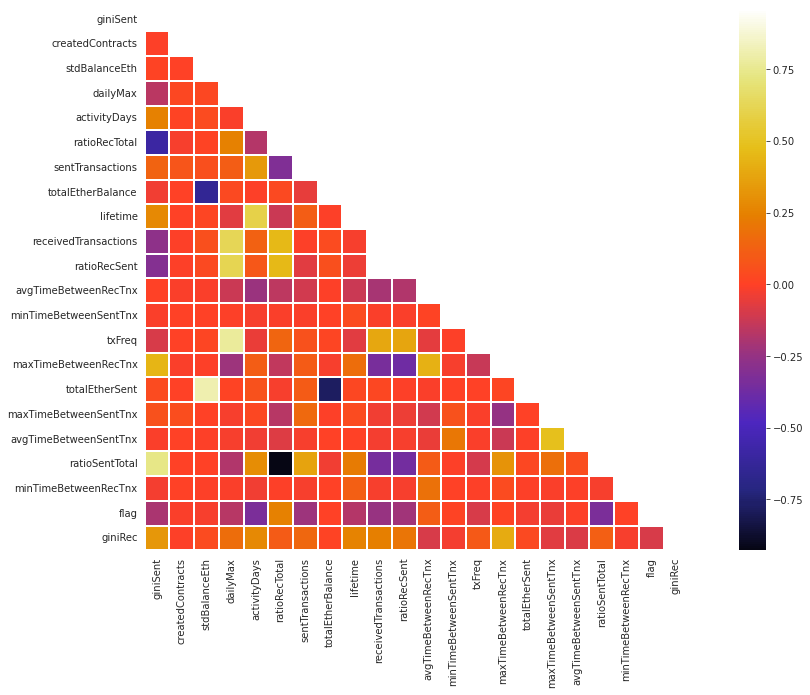

In [71]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [72]:
columns = df.columns
columns

Index(['giniSent', 'createdContracts', 'stdBalanceEth', 'dailyMax',
       'activityDays', 'ratioRecTotal', 'sentTransactions',
       'totalEtherBalance', 'lifetime', 'receivedTransactions', 'ratioRecSent',
       'avgTimeBetweenRecTnx', 'minTimeBetweenSentTnx', 'txFreq',
       'maxTimeBetweenRecTnx', 'totalEtherSent', 'maxTimeBetweenSentTnx',
       'avgTimeBetweenSentTnx', 'ratioSentTotal', 'minTimeBetweenRecTnx',
       'flag', 'giniRec'],
      dtype='object')

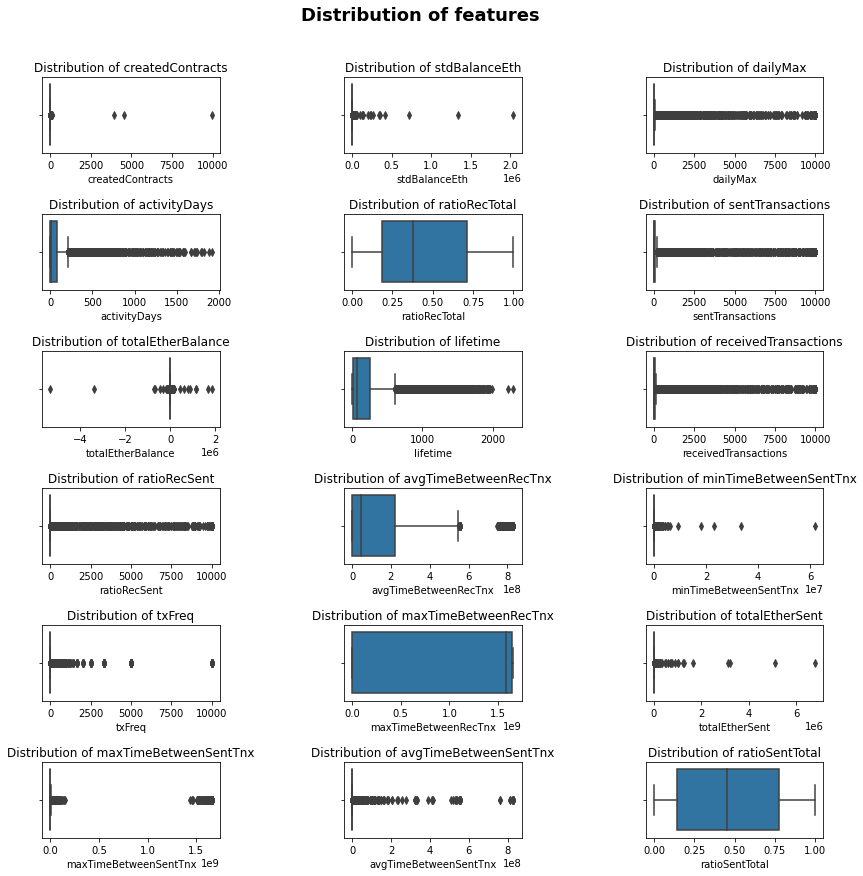

In [73]:
# Investigate the distribution of our features using boxplots
b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=df, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')
 
ax16 = sns.boxplot(ax = axes[5,1], data=df, x=columns[17])
ax16.set_title(f'Distribution of {columns[17]}')
 
ax17 = sns.boxplot(ax = axes[5,2], data=df, x=columns[18])
ax17.set_title(f'Distribution of {columns[18]}')

plt.show()

In [74]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column flag has the following distribution: 
0    6996
1    5150
Name: flag, dtype: int64


In [75]:
drops = ['minValSent', 'numUniqSentAddress']

In [76]:
new_col_list = list(set(columns).difference(set(drops)))
df = df[new_col_list]
df

,ratioRecSent,giniSent,avgTimeBetweenRecTnx,createdContracts,stdBalanceEth,minTimeBetweenSentTnx,dailyMax,activityDays,ratioRecTotal,txFreq,...,totalEtherSent,totalEtherBalance,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,ratioSentTotal,lifetime,minTimeBetweenRecTnx,flag,receivedTransactions,giniRec
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,0.313433,0.969121,7.148260e+07,0,147.701484,0.0,60,10,0.238636,1.891304,...,366.921190,0.291940,2387389.0,5.807655e+04,0.750000,46,89.0,1,21,0.888782
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,2.000000,0.000000,7.529115e+08,0,0.005000,0.0,1,2,0.666667,0.057143,...,0.000000,0.013541,0.0,0.000000e+00,0.000000,35,3021091.0,1,2,0.238480
0x00e01a648ff41346cdeb873182383333d2184dd1,1.375000,0.465450,6.820612e+07,0,52.129575,37.0,16,14,0.578947,0.123746,...,199.950000,0.266494,25112882.0,1.710279e+06,0.394737,299,0.0,1,22,0.614205
0x858457daa7e087ad74cdeeceab8419079bc2ca03,1.009091,0.957906,1.352571e+07,0,233.689231,0.0,67,36,0.502262,6.111111,...,1630.570000,0.007419,642460.0,1.576106e+04,0.493213,36,0.0,1,111,0.794121
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,2.000000,0.000000,3.751409e+08,0,0.757788,0.0,3,3,0.666667,0.060976,...,1.900000,0.002199,0.0,0.000000e+00,0.166667,82,3894.0,1,4,0.406556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x38e404b6ca4549988ced1d065330f1f722787924,0.866667,0.643490,1.275572e+08,0,0.236468,3.0,4,24,0.464286,1.080000,...,3.094515,0.009248,15139.0,1.186571e+03,0.500000,25,698.0,0,13,0.615051
0x8f40dac94ac52f90218d9aa5e605fe39dabe3979,0.166667,0.856372,8.295712e+07,0,0.617016,0.0,3,136,0.142857,0.932886,...,16.220988,-1.600064,411419.0,2.206761e+04,0.850000,149,0.0,0,20,0.289923
0xb92027b6adee9f63290a5a1bd9d15d6a163f4012,528.000000,0.000000,7.712044e+03,1,0.000000,0.0,296,41,0.996226,11.020833,...,0.000000,0.000000,0.0,0.000000e+00,0.000000,48,0.0,0,528,0.000000


It can be observed that the values of these two variables are mosty 0s. Thus, both features will be discarded since they will not be helpful for our model

In [77]:
# df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(12146, 22)


,ratioRecSent,giniSent,avgTimeBetweenRecTnx,createdContracts,stdBalanceEth,minTimeBetweenSentTnx,dailyMax,activityDays,ratioRecTotal,txFreq,...,totalEtherSent,totalEtherBalance,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,ratioSentTotal,lifetime,minTimeBetweenRecTnx,flag,receivedTransactions,giniRec
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,0.313433,0.969121,7.148260e+07,0,147.701484,0.0,60,10,0.238636,1.891304,...,366.92119,0.291940,2387389.0,5.807655e+04,0.750000,46,89.0,1,21,0.888782
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,2.000000,0.000000,7.529115e+08,0,0.005000,0.0,1,2,0.666667,0.057143,...,0.00000,0.013541,0.0,0.000000e+00,0.000000,35,3021091.0,1,2,0.238480
0x00e01a648ff41346cdeb873182383333d2184dd1,1.375000,0.465450,6.820612e+07,0,52.129575,37.0,16,14,0.578947,0.123746,...,199.95000,0.266494,25112882.0,1.710279e+06,0.394737,299,0.0,1,22,0.614205
0x858457daa7e087ad74cdeeceab8419079bc2ca03,1.009091,0.957906,1.352571e+07,0,233.689231,0.0,67,36,0.502262,6.111111,...,1630.57000,0.007419,642460.0,1.576106e+04,0.493213,36,0.0,1,111,0.794121
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,2.000000,0.000000,3.751409e+08,0,0.757788,0.0,3,3,0.666667,0.060976,...,1.90000,0.002199,0.0,0.000000e+00,0.166667,82,3894.0,1,4,0.406556


<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data preparation</p>

In [78]:
ordered_list = ['flag', 'dailyMax', 'lifetime', 'ratioRecSent', 'activityDays', 'giniSent',
       'maxTimeBetweenRecTnx', 'createdContracts', 'stdBalanceEth',
       'ratioRecTotal', 'avgTimeBetweenRecTnx', 'sentTransactions',
       'receivedTransactions', 'maxTimeBetweenSentTnx', 'totalEtherBalance',
       'minTimeBetweenRecTnx', 'txFreq', 'avgTimeBetweenSentTnx',
       'minTimeBetweenSentTnx', 'giniRec', 'totalEtherSent', 'ratioSentTotal']
df = df[ordered_list]
df

,flag,dailyMax,lifetime,ratioRecSent,activityDays,giniSent,maxTimeBetweenRecTnx,createdContracts,stdBalanceEth,ratioRecTotal,...,receivedTransactions,maxTimeBetweenSentTnx,totalEtherBalance,minTimeBetweenRecTnx,txFreq,avgTimeBetweenSentTnx,minTimeBetweenSentTnx,giniRec,totalEtherSent,ratioSentTotal
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,1,60,46,0.313433,10,0.969121,1.501076e+09,0,147.701484,0.238636,...,21,2387389.0,0.291940,89.0,1.891304,5.807655e+04,0.0,0.888782,366.921190,0.750000
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,1,35,2.000000,2,0.000000,1.502802e+09,0,0.005000,0.666667,...,2,0.0,0.013541,3021091.0,0.057143,0.000000e+00,0.0,0.238480,0.000000,0.000000
0x00e01a648ff41346cdeb873182383333d2184dd1,1,16,299,1.375000,14,0.465450,1.500397e+09,0,52.129575,0.578947,...,22,25112882.0,0.266494,0.0,0.123746,1.710279e+06,37.0,0.614205,199.950000,0.394737
0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,67,36,1.009091,36,0.957906,1.500037e+09,0,233.689231,0.502262,...,111,642460.0,0.007419,0.0,6.111111,1.576106e+04,0.0,0.794121,1630.570000,0.493213
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,3,82,2.000000,3,0.000000,1.500402e+09,0,0.757788,0.666667,...,4,0.0,0.002199,3894.0,0.060976,0.000000e+00,0.0,0.406556,1.900000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x38e404b6ca4549988ced1d065330f1f722787924,0,4,25,0.866667,24,0.643490,1.656129e+09,0,0.236468,0.464286,...,13,15139.0,0.009248,698.0,1.080000,1.186571e+03,3.0,0.615051,3.094515,0.500000
0x8f40dac94ac52f90218d9aa5e605fe39dabe3979,0,3,149,0.166667,136,0.856372,1.648939e+09,0,0.617016,0.142857,...,20,411419.0,-1.600064,0.0,0.932886,2.206761e+04,0.0,0.289923,16.220988,0.850000
0xb92027b6adee9f63290a5a1bd9d15d6a163f4012,0,296,48,528.000000,41,0.000000,4.086570e+05,1,0.000000,0.996226,...,528,0.0,0.000000,0.0,11.020833,0.000000e+00,0.0,0.000000,0.000000,0.000000


In [79]:
df = df.sample(frac = 1.0)
y = df.iloc[:, 0].to_numpy()
X = df.iloc[:, 1:].to_numpy()
print(X.shape, y.shape)
print("sum of y_train")
print(sum(y))

(12146, 21) (12146,)
sum of y_train
5150


KFold(n_splits=10, random_state=None, shuffle=False)
(10931, 21) (10931,)
(1215, 21) (1215,)
sum of y_train
4628
Shape of the training before SMOTE: ((10931, 21), (10931,))
Shape of the training after SMOTE: ((12606, 21), (12606,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6303 
 	Fauds: 4628
AFTER OVERSAMPLING 
 	Non-frauds: 6303 
 	Fauds: 6304
[[580 113]
 [ 76 446]]
(10931, 21) (10931,)
(1215, 21) (1215,)
sum of y_train
4635
Shape of the training before SMOTE: ((10931, 21), (10931,))
Shape of the training after SMOTE: ((12592, 21), (12592,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6296 
 	Fauds: 4635
AFTER OVERSAMPLING 
 	Non-frauds: 6296 
 	Fauds: 6297
[[574 126]
 [ 90 425]]
(10931, 21) (10931,)
(1215, 21) (1215,)
sum of y_train
4640
Shape of the training before SMOTE: ((10931, 21), (10931,))
Shape of the training after SMOTE: ((12582, 21), (12582,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6291 
 	Fauds: 4640
AFTER OVERSAMPLING 
 	Non-frauds: 6291 
 	Fauds: 6292
[[591 114]
 [ 71 439]]
(10931, 21) (1

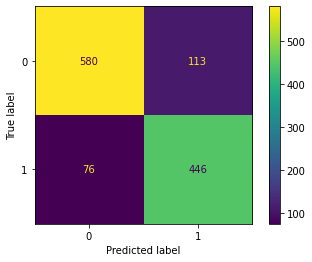

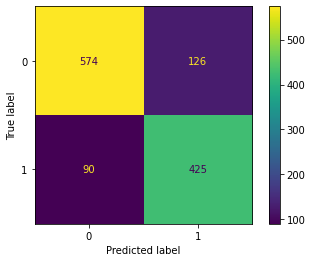

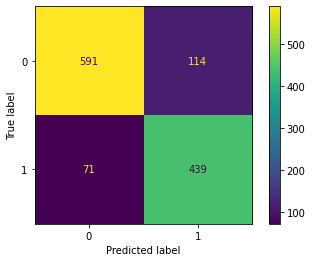

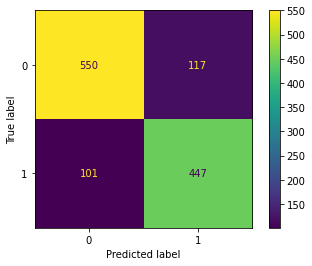

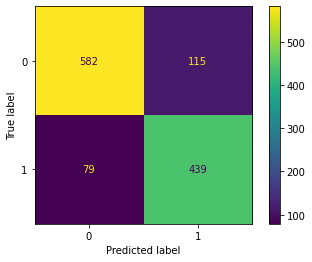

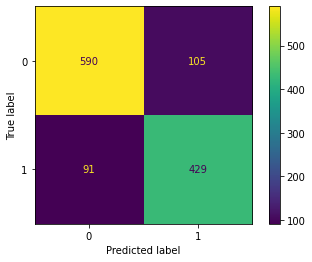

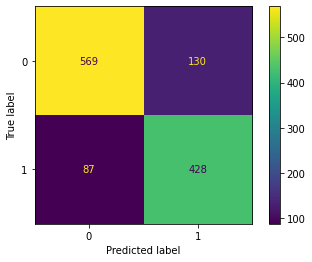

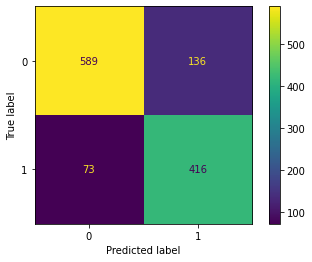

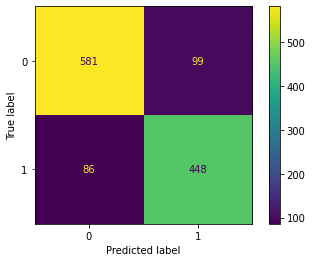

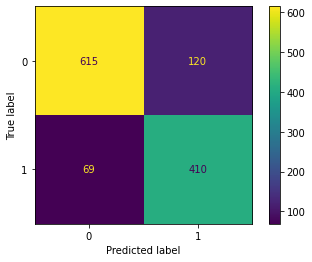

In [80]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
precisionList = []
print(kf)

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    print("sum of y_train")
    print(sum(y_train))
    
    # Normalize the training features
    norm = PowerTransformer()
    norm_train_f = norm.fit_transform(X_train)
    
    oversample = SMOTE()
    print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')
    x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
    print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')
    
    # Target distribution before SMOTE
    non_fraud = 0
    fraud = 0

    for i in y_train:
        if i == 0:
            non_fraud +=1
        else:
            fraud +=1

    # Target distribution after SMOTE
    no = 0
    yes = 1

    for j in y_tr_resample:
        if j == 0:
            no +=1
        else:
            yes +=1


    print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
    print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')
    
    LR = LogisticRegression(random_state=42)
    LR.fit(x_tr_resample, y_tr_resample)

    # Transform test features
    norm_test_f = norm.transform(X_test)

    preds = LR.predict(norm_test_f)
    # print(preds)
    #print(classification_report(y_test, preds))
    dict = classification_report(y_test, preds, output_dict=True)
    precisionList.append(dict['0']['precision'])
    
    print(confusion_matrix(y_test, preds))
    plot_confusion_matrix(LR, norm_test_f, y_test)
ave = sum(precisionList) / len(precisionList)
var = sum((i - ave) ** 2 for i in precisionList) / len(precisionList)
print()
print("Precision Info: ")
print("Minimum Precision: " + str(min(precisionList)))
print("Maximum Precision: " + str(max(precisionList)))
print("Average Precision: " + str(ave))
print("Variance Precision: " + str(var))
print()

KFold(n_splits=10, random_state=None, shuffle=False)
(10931, 21) (10931,)
(1215, 21) (1215,)
sum of y_train
4628
Shape of the training before SMOTE: ((10931, 21), (10931,))
Shape of the training after SMOTE: ((12606, 21), (12606,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6303 
 	Fauds: 4628
AFTER OVERSAMPLING 
 	Non-frauds: 6303 
 	Fauds: 6304
[[647  46]
 [ 24 498]]
(10931, 21) (10931,)
(1215, 21) (1215,)
sum of y_train
4635
Shape of the training before SMOTE: ((10931, 21), (10931,))
Shape of the training after SMOTE: ((12592, 21), (12592,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6296 
 	Fauds: 4635
AFTER OVERSAMPLING 
 	Non-frauds: 6296 
 	Fauds: 6297
[[659  41]
 [ 52 463]]
(10931, 21) (10931,)
(1215, 21) (1215,)
sum of y_train
4640
Shape of the training before SMOTE: ((10931, 21), (10931,))
Shape of the training after SMOTE: ((12582, 21), (12582,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6291 
 	Fauds: 4640
AFTER OVERSAMPLING 
 	Non-frauds: 6291 
 	Fauds: 6292
[[672  33]
 [ 39 471]]
(10931, 21) (1

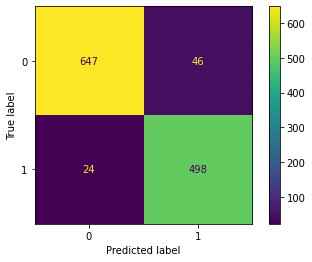

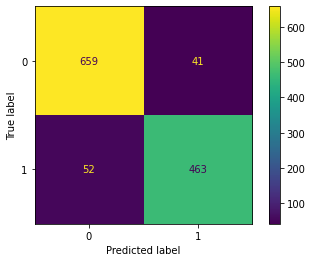

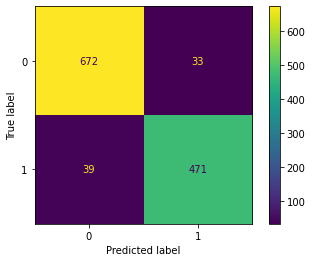

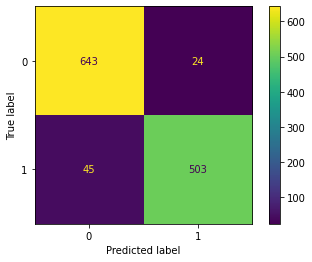

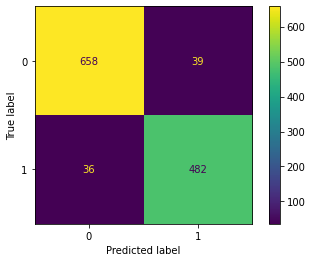

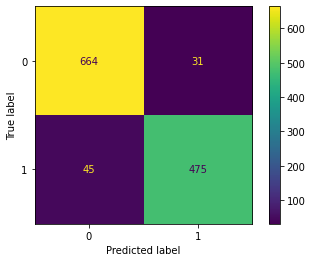

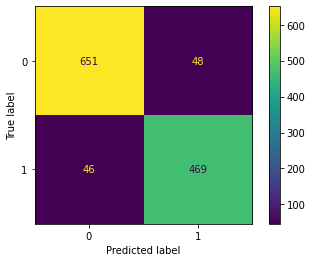

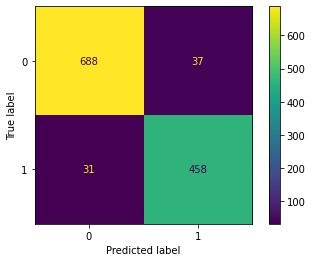

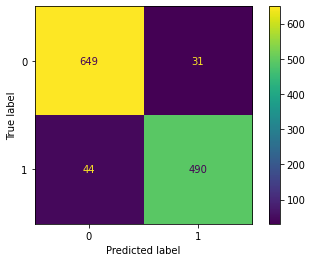

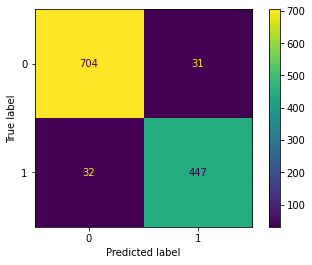

In [81]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
precisionList = []
print(kf)

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    print("sum of y_train")
    print(sum(y_train))
    
    # Normalize the training features
    norm = PowerTransformer()
    norm_train_f = norm.fit_transform(X_train)
    
    oversample = SMOTE()
    print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')
    x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
    print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')
    
    # Target distribution before SMOTE
    non_fraud = 0
    fraud = 0

    for i in y_train:
        if i == 0:
            non_fraud +=1
        else:
            fraud +=1

    # Target distribution after SMOTE
    no = 0
    yes = 1

    for j in y_tr_resample:
        if j == 0:
            no +=1
        else:
            yes +=1


    print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
    print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')
    
    RF = RandomForestClassifier(random_state=42)
    RF.fit(x_tr_resample, y_tr_resample)
    norm_test_f = norm.transform(X_test)
    preds_RF = RF.predict(norm_test_f)
    # print(classification_report(y_test, preds_RF))
    dict = classification_report(y_test, preds_RF, output_dict=True)
    precisionList.append(dict['0']['precision'])
    print(confusion_matrix(y_test, preds_RF))
    plot_confusion_matrix(RF, norm_test_f, y_test)

ave = sum(precisionList) / len(precisionList)
var = sum((i - ave) ** 2 for i in precisionList) / len(precisionList)
print()
print("Precision Info: ")
print("Minimum Precision: " + str(min(precisionList)))
print("Maximum Precision: " + str(max(precisionList)))
print("Average Precision: " + str(ave))
print("Variance Precision: " + str(var))
print()

KFold(n_splits=10, random_state=None, shuffle=False)
(10931, 21) (10931,)
(1215, 21) (1215,)
sum of y_train
4628
Shape of the training before SMOTE: ((10931, 21), (10931,))
Shape of the training after SMOTE: ((12606, 21), (12606,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6303 
 	Fauds: 4628
AFTER OVERSAMPLING 
 	Non-frauds: 6303 
 	Fauds: 6304
[[663  30]
 [ 36 486]]
(10931, 21) (10931,)
(1215, 21) (1215,)
sum of y_train
4635
Shape of the training before SMOTE: ((10931, 21), (10931,))
Shape of the training after SMOTE: ((12592, 21), (12592,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6296 
 	Fauds: 4635
AFTER OVERSAMPLING 
 	Non-frauds: 6296 
 	Fauds: 6297
[[664  36]
 [ 33 482]]
(10931, 21) (10931,)
(1215, 21) (1215,)
sum of y_train
4640
Shape of the training before SMOTE: ((10931, 21), (10931,))
Shape of the training after SMOTE: ((12582, 21), (12582,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6291 
 	Fauds: 4640
AFTER OVERSAMPLING 
 	Non-frauds: 6291 
 	Fauds: 6292
[[677  28]
 [ 32 478]]
(10931, 21) (1

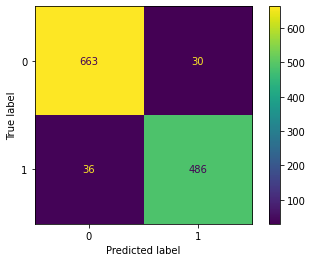

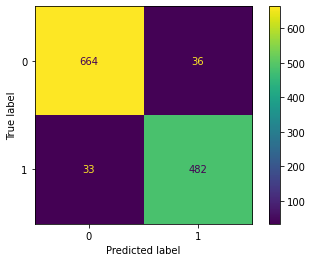

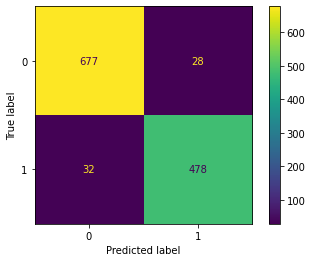

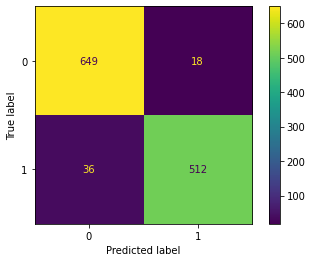

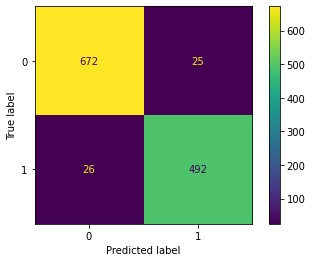

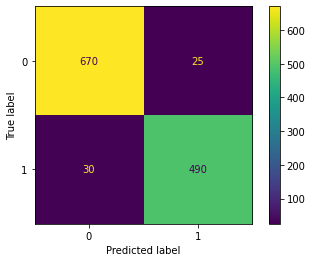

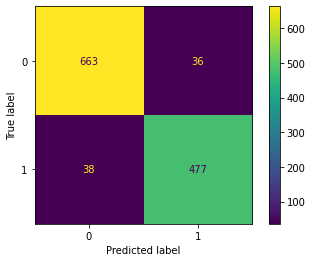

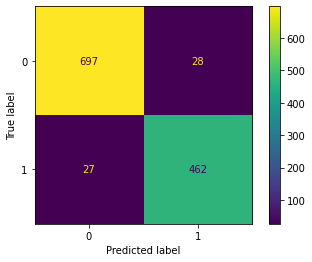

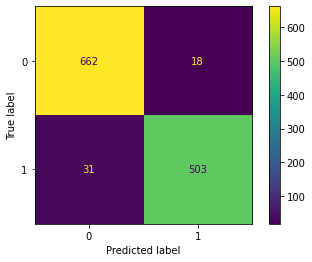

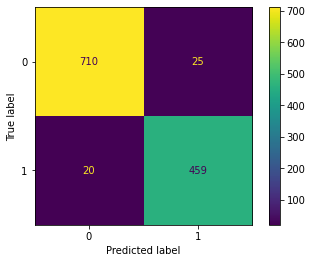

In [82]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
precisionList = []
print(kf)

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    print("sum of y_train")
    print(sum(y_train))
    
    # Normalize the training features
    norm = PowerTransformer()
    norm_train_f = norm.fit_transform(X_train)
    
    oversample = SMOTE()
    print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')
    x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
    print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')
    
    # Target distribution before SMOTE
    non_fraud = 0
    fraud = 0

    for i in y_train:
        if i == 0:
            non_fraud +=1
        else:
            fraud +=1

    # Target distribution after SMOTE
    no = 0
    yes = 1

    for j in y_tr_resample:
        if j == 0:
            no +=1
        else:
            yes +=1


    print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
    print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')
    
    xgb_c = xgb.XGBClassifier(random_state=42)
    xgb_c.fit(x_tr_resample, y_tr_resample)
    norm_test_f = norm.transform(X_test)
    preds_xgb = xgb_c.predict(norm_test_f)
    # print(classification_report(y_test, preds_xgb))
    dict = classification_report(y_test, preds_xgb, output_dict=True)
    precisionList.append(dict['0']['precision'])
    print(confusion_matrix(y_test, preds_xgb))
    plot_confusion_matrix(xgb_c, norm_test_f, y_test)

ave = sum(precisionList) / len(precisionList)
var = sum((i - ave) ** 2 for i in precisionList) / len(precisionList)
print()
print("Precision Info: ")
print("Minimum Precision: " + str(min(precisionList)))
print("Maximum Precision: " + str(max(precisionList)))
print("Average Precision: " + str(ave))
print("Variance Precision: " + str(var))
print()

KFold(n_splits=10, random_state=None, shuffle=False)
(10931, 21) (10931,)
(1215, 21) (1215,)
sum of y_train
4628
Shape of the training before SMOTE: ((10931, 21), (10931,))
Shape of the training after SMOTE: ((12606, 21), (12606,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6303 
 	Fauds: 4628
AFTER OVERSAMPLING 
 	Non-frauds: 6303 
 	Fauds: 6304
[[597  96]
 [ 75 447]]
(10931, 21) (10931,)
(1215, 21) (1215,)
sum of y_train
4635
Shape of the training before SMOTE: ((10931, 21), (10931,))
Shape of the training after SMOTE: ((12592, 21), (12592,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6296 
 	Fauds: 4635
AFTER OVERSAMPLING 
 	Non-frauds: 6296 
 	Fauds: 6297
[[598 102]
 [ 80 435]]
(10931, 21) (10931,)
(1215, 21) (1215,)
sum of y_train
4640
Shape of the training before SMOTE: ((10931, 21), (10931,))
Shape of the training after SMOTE: ((12582, 21), (12582,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6291 
 	Fauds: 4640
AFTER OVERSAMPLING 
 	Non-frauds: 6291 
 	Fauds: 6292
[[618  87]
 [ 80 430]]
(10931, 21) (1

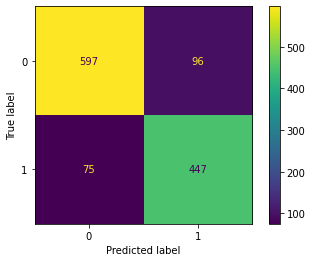

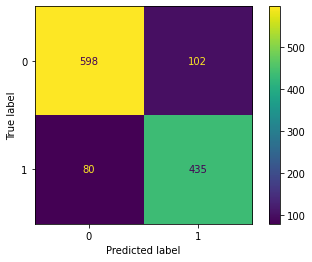

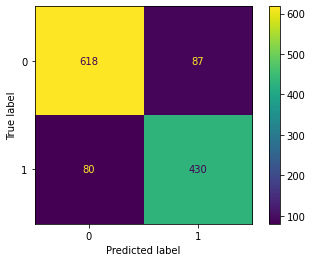

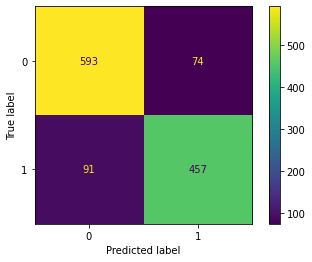

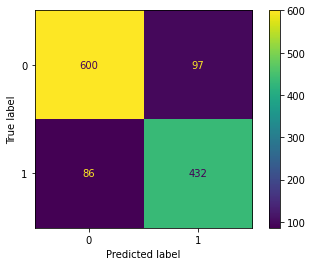

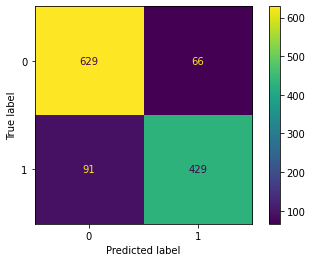

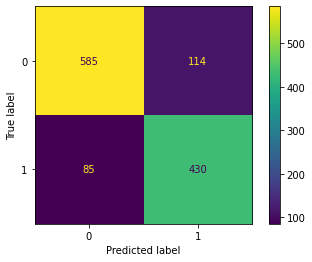

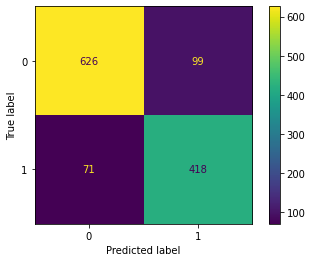

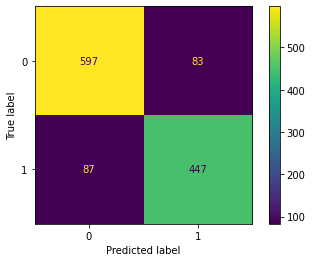

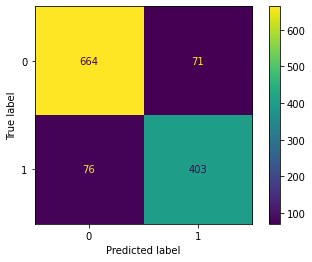

In [83]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
precisionList = []
print(kf)

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    print("sum of y_train")
    print(sum(y_train))
    
    # Normalize the training features
    norm = PowerTransformer()
    norm_train_f = norm.fit_transform(X_train)
    
    oversample = SMOTE()
    print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')
    x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
    print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')
    
    # Target distribution before SMOTE
    non_fraud = 0
    fraud = 0

    for i in y_train:
        if i == 0:
            non_fraud +=1
        else:
            fraud +=1

    # Target distribution after SMOTE
    no = 0
    yes = 1

    for j in y_tr_resample:
        if j == 0:
            no +=1
        else:
            yes +=1


    print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
    print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(x_tr_resample, y_tr_resample)
    norm_test_f = norm.transform(X_test)
    pred = knn.predict(norm_test_f)
    # print(classification_report(y_test, preds))
    dict = classification_report(y_test, pred, output_dict=True)
    precisionList.append(dict['0']['precision'])
    print(confusion_matrix(y_test, pred))
    plot_confusion_matrix(knn, norm_test_f, y_test)

ave = sum(precisionList) / len(precisionList)
var = sum((i - ave) ** 2 for i in precisionList) / len(precisionList)
print()
print("Precision Info: ")
print("Minimum Precision: " + str(min(precisionList)))
print("Maximum Precision: " + str(max(precisionList)))
print("Average Precision: " + str(ave))
print("Variance Precision: " + str(var))
print()